
## Import libraries and src files


In [9]:
import sys
import os
# go up one directory from notebooks/ → project root
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)
import numpy as np
import wfdb
from src import PreProcessing

import matplotlib.pyplot as plt


## Read raw data form data/100
Taking the first n samples form two channels MLII and V5
signal_list contains the the np array form of the signal values. Its a 2D(n,2) list containing MLII and V5 values. 
r_peak will store the peak values form the annotation .atr file
r_peak_time will store the time domain representation of peak values

NOTE: Do not change the sampfrom = 0 for the record, its on purpose.
Its weird how wfdb.rdrecord works.


Finally we will plot the annotation and signal_list


Peak values are located in time:  [0.21388889 1.02777778]


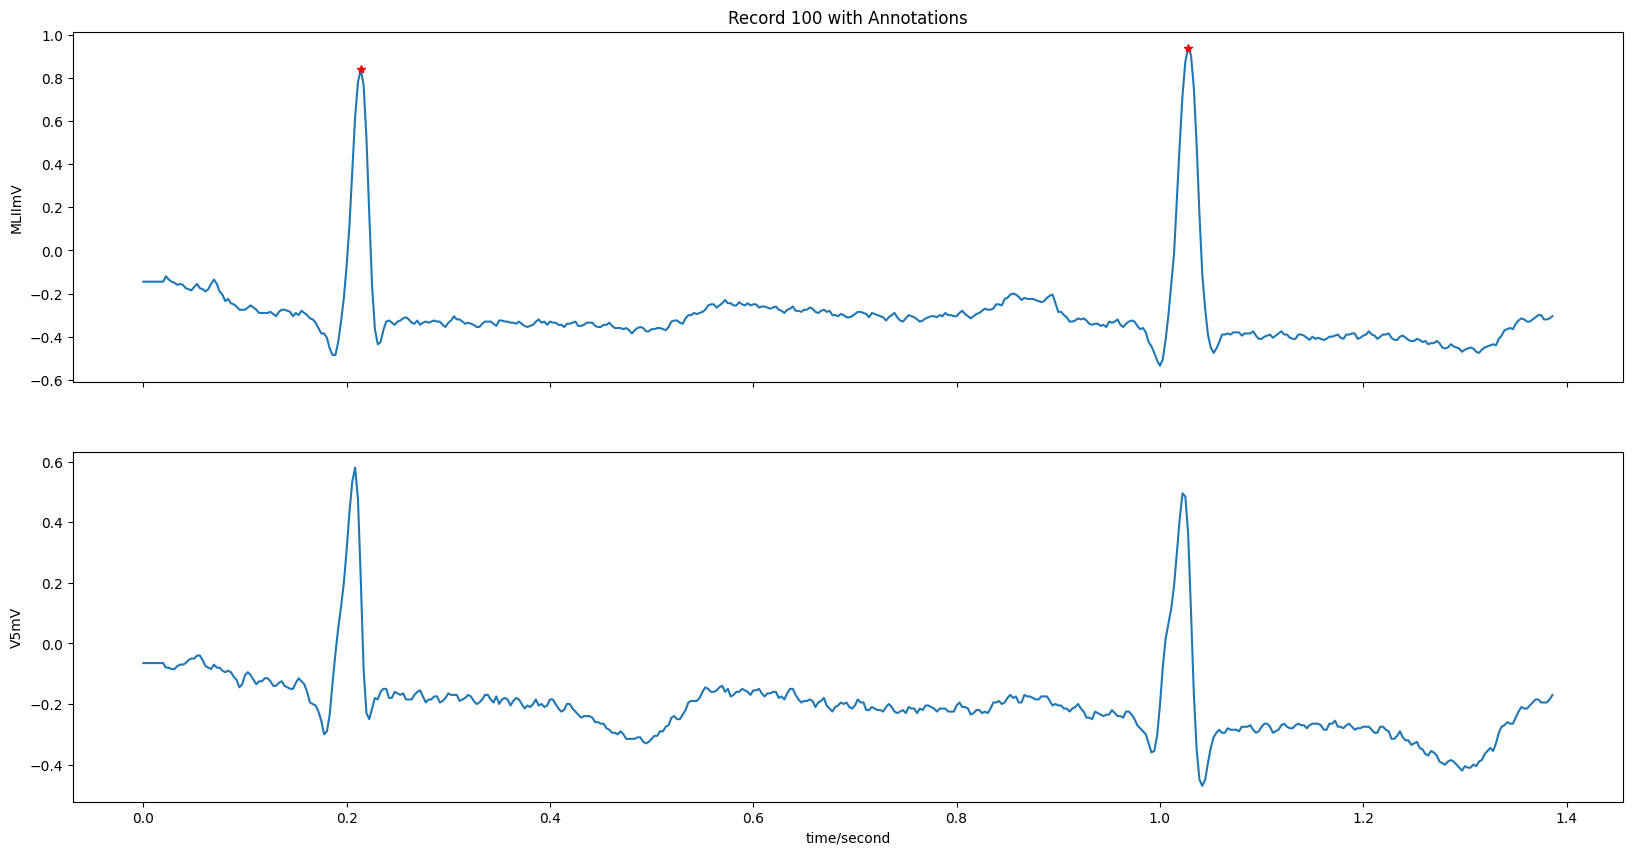

In [120]:
record_path = os.path.join(os.getcwd(), "..", "data", "100")
starting_sample = 70
ending_sample = 500
#take inputs
record = wfdb.rdrecord(record_path,sampfrom = 0, sampto = ending_sample, channels =[0,1])
annotation = wfdb.rdann(record_path, 'atr', sampfrom = starting_sample, sampto =ending_sample)
fs = record.fs


#useful lists
signal_list = np.array(record.p_signal.tolist())
signal_list = signal_list[starting_sample:,:]
r_peak =  np.array(annotation.sample.tolist())
r_peak_time = r_peak[:] / fs
print("Peak values are located in time: ",r_peak_time)


#plot
wfdb.plot_wfdb(record=record, annotation=annotation, title='Record 100 with Annotations', time_units='seconds', figsize =(20,10)) 


## Now implementing the filter on our input signal, signal_list


In [132]:
def windowedimpulseResponse(FL,FH,fs,N):
    
    w1 = (2 * np.pi * FL)/fs
    w2 = (2 * np.pi * FH)/fs
    hn = []
    for n in range (N):
        k = (n-(N-1)/2)
        if k == 0:
            hn.append((w2-w1)/2 *np.pi)
        else: 
            hn.append((np.exp(1j * ((w2+w1)/2) * k)) * np.sin(((w2-w1)/2) * k))
    w = np.hanning(N)
    return np.real(hn * w)


In [133]:
#parameters
low_freq = 0.5 #In hertz
high_freq = 40
N = len(signal_list[:,0])
print(N)
impulse_response = windowedimpulseResponse(low_freq,high_freq,fs,N)
print(impulse_response)

430
[ 0.00000000e+00  5.20812503e-05  1.71899094e-04  2.32224664e-04
  1.38104051e-04 -1.19011356e-05  9.95591168e-05  8.26121019e-04
  2.25473688e-03  3.99348254e-03  5.25153541e-03  5.25057811e-03
  3.77722964e-03  1.53453727e-03 -4.01712922e-06  7.18239905e-04
  4.40707572e-03  1.02561530e-02  1.60282362e-02  1.90008575e-02
  1.74088568e-02  1.16505549e-02  4.51938465e-03  1.42766582e-04
  1.98384406e-03  1.08471942e-02  2.39836755e-02  3.59612506e-02
  4.11095393e-02  3.64660918e-02  2.37281809e-02  9.03575030e-03
  4.03140288e-04  3.83404236e-03  1.99768166e-02  4.31237195e-02
  6.33538610e-02  7.10838356e-02  6.19642397e-02  3.96560198e-02
  1.48437021e-02  5.94098303e-04  6.04145617e-03  3.14256109e-02
  6.71157595e-02  9.74859981e-02  1.08142684e-01  9.31838658e-02
  5.88648250e-02  2.15339005e-02  3.88274599e-04  8.22845165e-03
  4.46405299e-02  9.51742621e-02  1.37381560e-01  1.51244795e-01
  1.29170822e-01  8.05949098e-02  2.85501819e-02 -6.64265770e-04
  9.89042494e-03  5.8